In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv('/content/amazon_reviews.csv')

# Display the first few rows of the dataset
print(df.head())

   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4.0   
1           1          0mie      5.0   
2           2           1K3      4.0   
3           3           1m2      5.0   
4           4  2&amp;1/2Men      5.0   

                                          reviewText  reviewTime  day_diff  \
0                                         No issues.  2014-07-23       138   
1  Purchased this for my device, it worked as adv...  2013-10-25       409   
2  it works as expected. I should have sprung for...  2012-12-23       715   
3  This think has worked out great.Had a diff. br...  2013-11-21       382   
4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   

   helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
0            0           0           0                   0   
1            0           0           0                   0   
2            0           0           0                   0   
3            0           0           0    

In [ ]:
# Basic information about the dataset
print("Basic Information:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB
None

First few rows:
   Unnamed: 0  reviewerName  overall  \
0           0           NaN      4

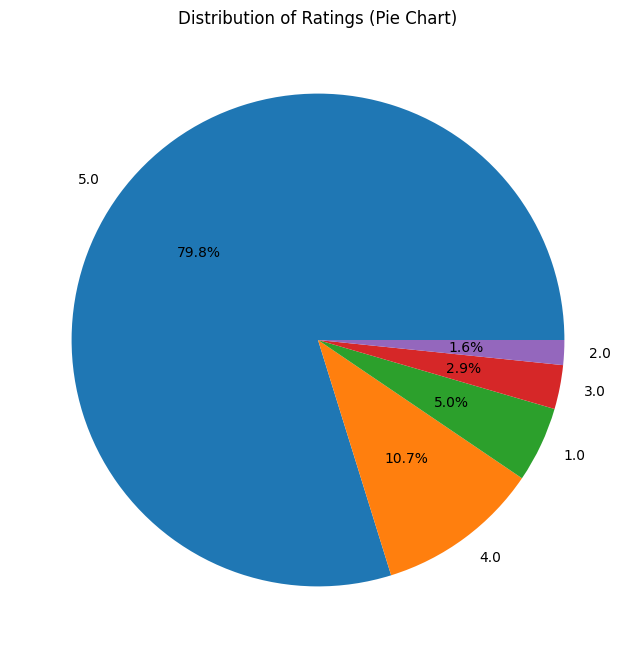

In [ ]:
# 1. Pie Chart for Rating Distribution
plt.figure(figsize=(10, 8))
ratings_count = df['overall'].value_counts()
plt.pie(ratings_count.values, labels=ratings_count.index, autopct='%1.1f%%')
plt.title('Distribution of Ratings (Pie Chart)')
plt.show()


In [ ]:

import plotly.graph_objects as go # Import the plotly.graph_objects module and alias it as 'go'


# 2. Donut Chart for Rating Distribution
fig = go.Figure(data=[go.Pie(labels=ratings_count.index,
                            values=ratings_count.values,
                            hole=.3)]) # Now 'go' is defined and can be used
fig.update_layout(title='Distribution of Ratings (Donut Chart)')
fig.show()

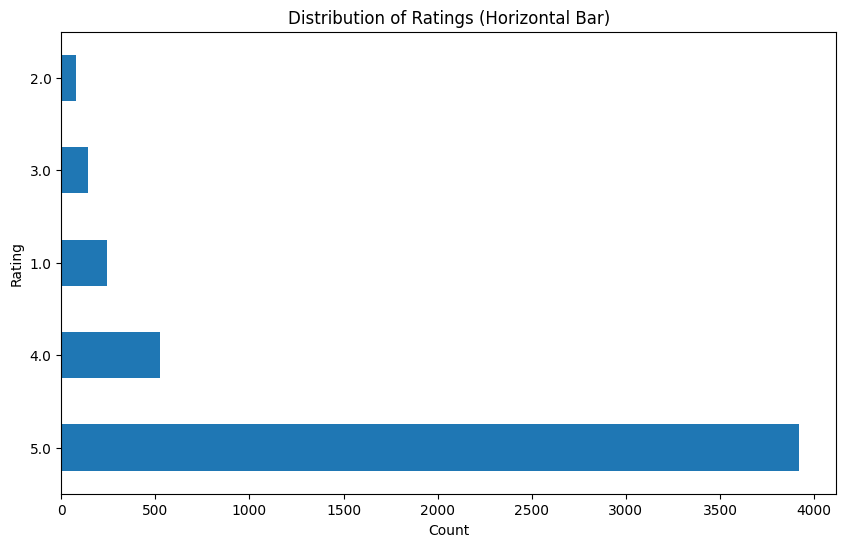

In [ ]:
# 3. Horizontal Bar Chart for Rating Distribution
plt.figure(figsize=(10, 6))
ratings_count.plot(kind='barh')
plt.title('Distribution of Ratings (Horizontal Bar)')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

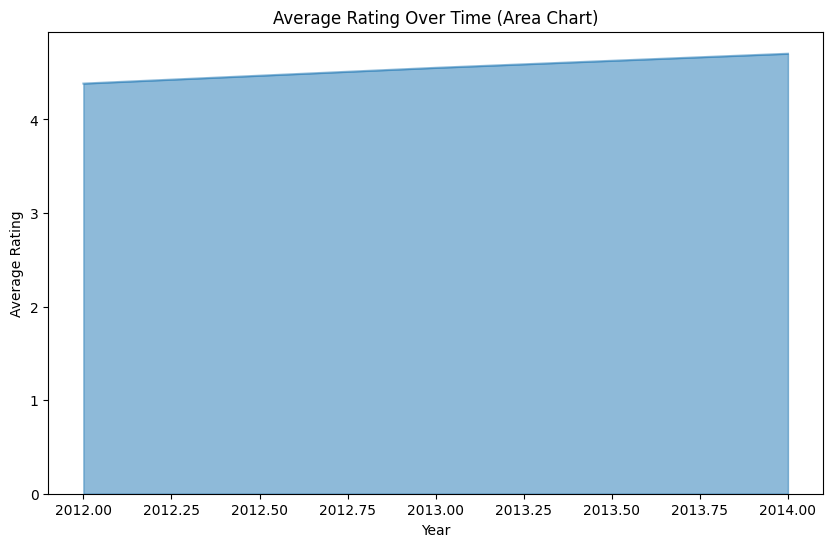

In [ ]:
# 4. Area Chart for Ratings Over Time
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
yearly_ratings = df.groupby('year')['overall'].mean()
plt.figure(figsize=(10, 6))
yearly_ratings.plot(kind='area', alpha=0.5)
plt.title('Average Rating Over Time (Area Chart)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

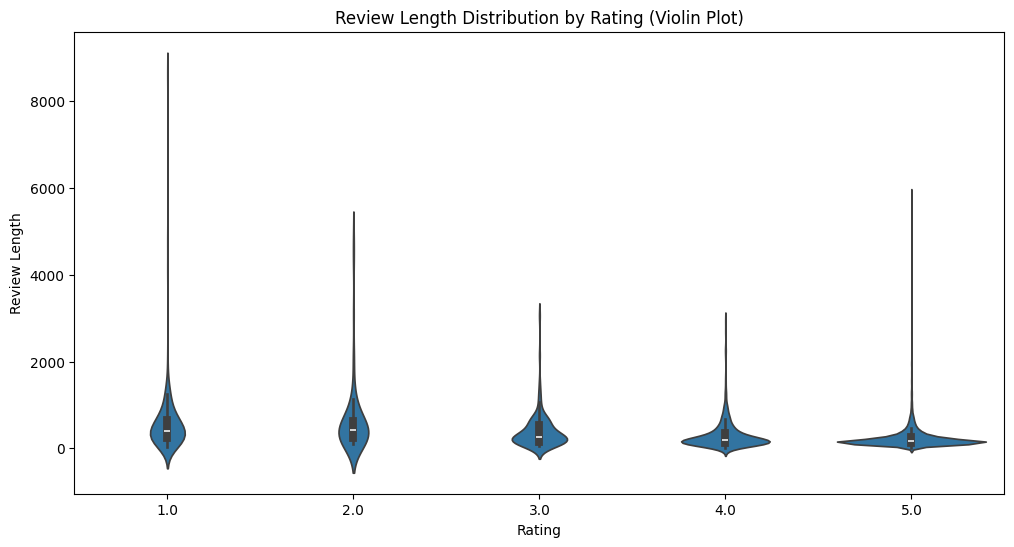

In [ ]:
# 5. Violin Plot for Review Length Distribution
plt.figure(figsize=(12, 6))
df['review_length'] = df['reviewText'].str.len()
sns.violinplot(x='overall', y='review_length', data=df)
plt.title('Review Length Distribution by Rating (Violin Plot)')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.show()

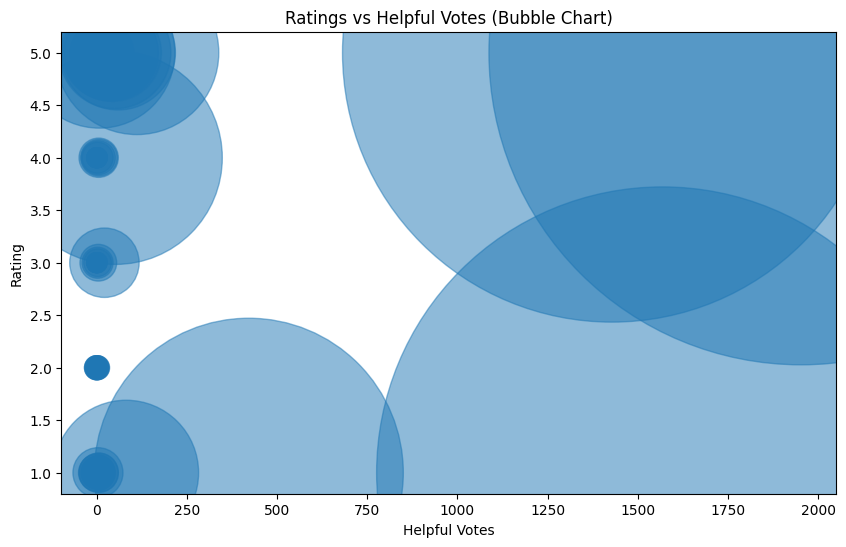

In [ ]:
# 6. Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['helpful_yes'], df['overall'],
           s=df['total_vote']*100, alpha=0.5)
plt.title('Ratings vs Helpful Votes (Bubble Chart)')
plt.xlabel('Helpful Votes')
plt.ylabel('Rating')
plt.show()

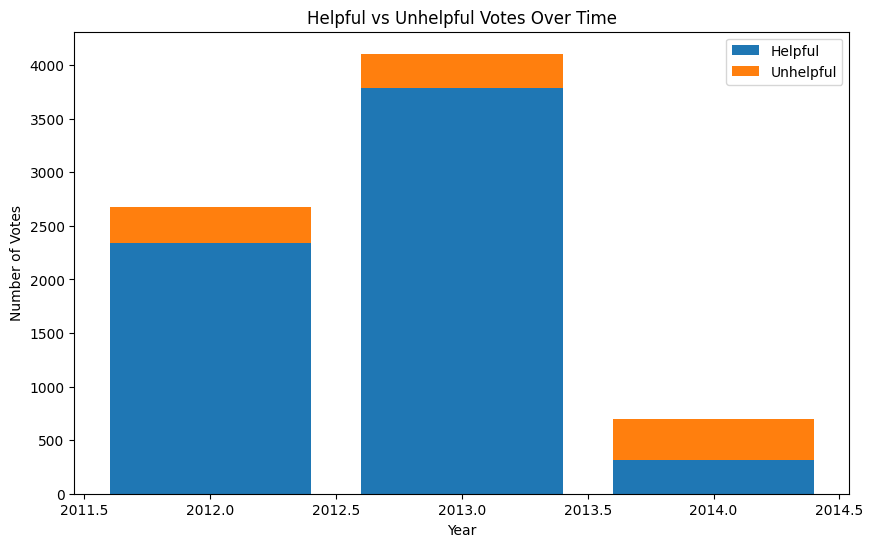

In [ ]:
# 7. Stacked Bar Chart for Helpful vs Unhelpful Votes
yearly_votes = df.groupby('year').agg({
    'helpful_yes': 'sum',
    'helpful_no': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(yearly_votes['year'], yearly_votes['helpful_yes'],
        label='Helpful')
plt.bar(yearly_votes['year'], yearly_votes['helpful_no'],
        bottom=yearly_votes['helpful_yes'], label='Unhelpful')
plt.title('Helpful vs Unhelpful Votes Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Votes')
plt.legend()
plt.show()


In [ ]:
# 8. Radar Chart for Average Metrics
metrics = ['overall', 'helpful_yes', 'helpful_no',
          'total_vote', 'score_average_rating']
avg_metrics = df[metrics].mean()

fig = go.Figure(data=go.Scatterpolar(
    r=avg_metrics,
    theta=metrics,
    fill='toself'
))
fig.update_layout(title='Average Metrics (Radar Chart)')
fig.show()


In [ ]:
# Import the necessary library and assign it to the alias 'px'
import plotly.express as px

# 9. Treemap for Review Distribution
fig = px.treemap(df,
                 path=['year', 'overall'],
                 values='total_vote',
                 title='Review Distribution Treemap')
fig.show()